# Principal Component Analysis - Iris

Let's take a look at PCA again using the Iris dataset as an example to reinforce some concepts.

## Load data

In [1]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True, as_frame=True)
X.columns = ['s_length', 's_width', 'p_length', 'p_width']

X.shape, y.shape

((150, 4), (150,))

In [2]:
X.head()

,s_length,s_width,p_length,p_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## PCA

The procedure of PCA to work is to 

- map `X` to z-scores, `Z`, 
- compute the covariance matrix `C` of `Z`, and
- apply singular-value decomposition (SVD) to `Z` resulting in `U`, `S`, `VT`.

Here are the denotations.

- `X`: data
- `Z`: data mapped to z-scores
- `C`: covariance matrix of `Z`
- `U`: left-hand eigen-vectors
- `S`: eigen-values
- `VT`: right-hand eigen-vectors

Getting `Z` and `C` is performed as follows.

In [3]:
from scipy.stats import zscore

Z = X.apply(zscore)
C = Z.cov()

SVD is applied to `C` as follows.

In [4]:
from numpy.linalg import svd

U, S, VT = svd(C, full_matrices=False)

U.shape, S.shape, VT.shape

((4, 4), (4,), (4, 4))

In [5]:
U

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [6]:
S

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [7]:
VT

array([[-0.52106591,  0.26934744, -0.5804131 , -0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

## Interpretation of S

When `S` is normalized so that the elements sum to unit, each resulting element is the amount of variance accounted for by its corresponding principal component. According to what we see below, the first 2 principal components account for (0.73 + 0.22) 95% of the variance in the data. Note that the elements in `S` are produced from largest to smallest; the first principal component accounts for the largest variance, followed by the second and so on.

In [8]:
S / S.sum()

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

## Interpretation of U and VT

`U` and `VT` are just transpose of one another and they represent the strength of association between the features in `X` and principal components.

- For `U`, the columns correspond to principal components and rows to features.
- For `VT`, the opposite is true; columns correspond to features and rows to principal components.

Each element in `U` or `VT` gives you a strength of association between the corresponding feature and principal component. 

In [9]:
import pandas as pd

pd.DataFrame(U, columns=X.columns, index=[f'PC-{i}' for i in range(U.shape[1])])

,s_length,s_width,p_length,p_width
PC-0,-0.521066,-0.377418,0.719566,0.261286
PC-1,0.269347,-0.923296,-0.244382,-0.123510
PC-2,-0.580413,-0.024492,-0.142126,-0.801449
PC-3,-0.564857,-0.066942,-0.634273,0.523597


In [10]:
pd.DataFrame(VT, columns=[f'PC-{i}' for i in range(VT.shape[1])], index=X.columns)

,PC-0,PC-1,PC-2,PC-3
s_length,-0.521066,0.269347,-0.580413,-0.564857
s_width,-0.377418,-0.923296,-0.024492,-0.066942
p_length,0.719566,-0.244382,-0.142126,-0.634273
p_width,0.261286,-0.123510,-0.801449,0.523597


## Loadings squared

The loadings gives you the Pearson correlation between a feature and PC, while the the loadings squared gives you how much of a feature's variance is explained by each principal component. The sum of the variance explained by the principal components (for a feature) should sum to one. 

Loadings `L` and loadings squared `I` is computed as follows.

- $L = U \times \sqrt{S}$
- $I = L^2$

In [11]:
import numpy as np

L = U * np.sqrt(S)

pd.DataFrame(L, columns=[f'PC-{i}' for i in range(L.shape[1])], index=X.columns)

,PC-0,PC-1,PC-2,PC-3
s_length,-0.893151,-0.362039,0.276581,0.037732
s_width,0.461684,-0.885673,-0.093934,-0.017836
p_length,-0.994877,-0.023494,-0.054629,-0.115736
p_width,-0.968212,-0.064214,-0.243797,0.075612


From the table above, ignoring the sign (positive or negative), for `s_length`,

- it is most correlated to the first PC,
- followed by the second, 
- the third, and
- very little to the fourth.

In contrast, note how `s_width` is most correlated to the second PC.

In [12]:
import numpy as np

I = np.power(L, 2)

pd.DataFrame(I, columns=[f'PC-{i}' for i in range(I.shape[1])], index=X.columns)

,PC-0,PC-1,PC-2,PC-3
s_length,0.797719,0.131072,0.076497,0.001424
s_width,0.213152,0.784417,0.008824,0.000318
p_length,0.989780,0.000552,0.002984,0.013395
p_width,0.937434,0.004123,0.059437,0.005717


From the table above, for `s_length`,

- 80% of its variance is explained by the first PC, 
- 13% by the second, 
- 8% by the third, and
- none by the fourth.

On the contrary, note how most of the variance of `s_width` is captured by the second PC.

## Projection into PC space

PCA is typically used to reduce dimensionality, or, in other words, represent the data in lower dimension. Once you get `U` or `VT`, you can project the z-scaled data `Z` to PC space by a simple multiplication. From the looks of things above, it seems the first PCs account 95% of the data's variance, and so we can project the 4-dimensional `Z` data to 2-dimensional PC data/representation.

In [13]:
P = pd.DataFrame(np.dot(Z, U[:,:2]), columns=['PC-0', 'PC-1'])

Z.shape, P.shape

((150, 4), (150, 2))

In [14]:
P.head()

,PC-0,PC-1
0,2.264703,-0.480027
1,2.080961,0.674134
2,2.364229,0.341908
3,2.299384,0.597395
4,2.389842,-0.646835


From the scatter plot below, the different iris flower species seem to be linearly separable in 2D PC space. 

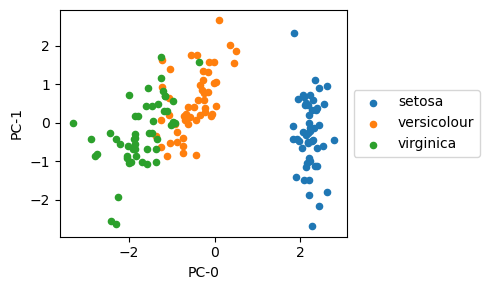

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 3))

for label, color, clazz in zip(y.unique(), sns.color_palette('tab10'), ['setosa', 'versicolour', 'virginica']):
    P[y==label].plot(kind='scatter', x='PC-0', y='PC-1', color=color, ax=ax, label=clazz)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()

## Another view of U and VT

If we regress each PC on `Z`, we recover the eigenvectors.

- $P_0 \sim Z$
- $P_1 \sim Z$
- $P_2 \sim Z$
- $P_3 \sim Z$

Compare the 2 regressions below to `VT`.

In [16]:
from sklearn.linear_model import LinearRegression

m = LinearRegression(fit_intercept=False)
m.fit(Z, P['PC-0'])

m.coef_

array([-0.52106591,  0.26934744, -0.5804131 , -0.56485654])

In [17]:
m = LinearRegression(fit_intercept=False)
m.fit(Z, P['PC-1'])

m.coef_

array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])

In [18]:
pd.DataFrame(VT, columns=X.columns, index=[f'PC-{i}' for i in range(VT.shape[1])])

,s_length,s_width,p_length,p_width
PC-0,-0.521066,0.269347,-0.580413,-0.564857
PC-1,-0.377418,-0.923296,-0.024492,-0.066942
PC-2,0.719566,-0.244382,-0.142126,-0.634273
PC-3,0.261286,-0.123510,-0.801449,0.523597
